In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, MINUTE_DB_NAME

def runBacktesting(strategyClass, settingDict, symbol, 
                   startDate, endDate, slippage, 
                   rate, size, priceTick):
    """运行单标的回测"""
    engine = BacktestingEngine()
    engine.setBacktestingMode(engine.BAR_MODE)
    engine.setDatabase(MINUTE_DB_NAME, symbol)
    engine.setStartDate(startDate)
    engine.setEndDate(endDate)
    engine.setSlippage(slippage)
    engine.setRate(rate)   
    engine.setSize(size)         
    engine.setPriceTick(priceTick)
    
    engine.initStrategy(strategyClass, settingDict)
    engine.runBacktesting()
    df = engine.calculateDailyResult()
    return df

In [2]:
# 运行IF回测，交易1手
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy
df1 = runBacktesting(AtrRsiStrategy, {}, 'IF0000', 
                     '20120101', '20170630', 0.2, 
                     0.3/10000, 300, 0.2)

2018-01-07 17:18:45.507000	开始载入数据
2018-01-07 17:18:45.654000	载入完成，数据量：348690
2018-01-07 17:18:45.654000	开始回测
2018-01-07 17:18:45.694000	策略初始化完成
2018-01-07 17:18:45.694000	策略启动完成
2018-01-07 17:18:45.694000	开始回放数据
2018-01-07 17:19:17.327000	数据回放结束
2018-01-07 17:19:17.327000	计算按日统计结果


In [3]:
# 运行rb回测，交易16手
from vnpy.trader.app.ctaStrategy.strategy.strategyBollChannel import BollChannelStrategy
settingDict = {'fixedSize': 16}
df2 = runBacktesting(BollChannelStrategy, settingDict, 'rb0000', 
                     '20120101', '20170630', 1, 
                     1/10000, 10, 1)

2018-01-07 17:19:26.235000	开始载入数据
2018-01-07 17:19:26.396000	载入完成，数据量：370838
2018-01-07 17:19:26.396000	开始回测
2018-01-07 17:19:26.404000	策略初始化完成
2018-01-07 17:19:26.404000	策略启动完成
2018-01-07 17:19:26.404000	开始回放数据
2018-01-07 17:19:43.626000	数据回放结束
2018-01-07 17:19:43.627000	计算按日统计结果


2018-01-07 17:23:24.218000	------------------------------
2018-01-07 17:23:24.218000	首个交易日：	2012-01-11
2018-01-07 17:23:24.218000	最后交易日：	2017-06-30
2018-01-07 17:23:24.218000	总交易日：	1328
2018-01-07 17:23:24.218000	盈利交易日	675
2018-01-07 17:23:24.218000	亏损交易日：	653
2018-01-07 17:23:24.218000	起始资金：	1000000
2018-01-07 17:23:24.218000	结束资金：	2,495,104.82
2018-01-07 17:23:24.218000	总收益率：	149.51
2018-01-07 17:23:24.218000	总盈亏：	1,495,104.82
2018-01-07 17:23:24.218000	最大回撤: 	-151,844.23
2018-01-07 17:23:24.218000	总手续费：	216,395.18
2018-01-07 17:23:24.218000	总滑点：	556,780.0
2018-01-07 17:23:24.218000	总成交金额：	7,521,413,620.0
2018-01-07 17:23:24.218000	总成交笔数：	8,168.0
2018-01-07 17:23:24.218000	日均盈亏：	1,125.83
2018-01-07 17:23:24.218000	日均手续费：	162.95
2018-01-07 17:23:24.218000	日均滑点：	419.26
2018-01-07 17:23:24.218000	日均成交金额：	5,663,715.08
2018-01-07 17:23:24.218000	日均成交笔数：	6.15
2018-01-07 17:23:24.218000	日均收益率：	0.07%
2018-01-07 17:23:24.218000	收益标准差：	0.97%
2018-01-07 17:23:24.218000	Sharpe Ratio：	1.11


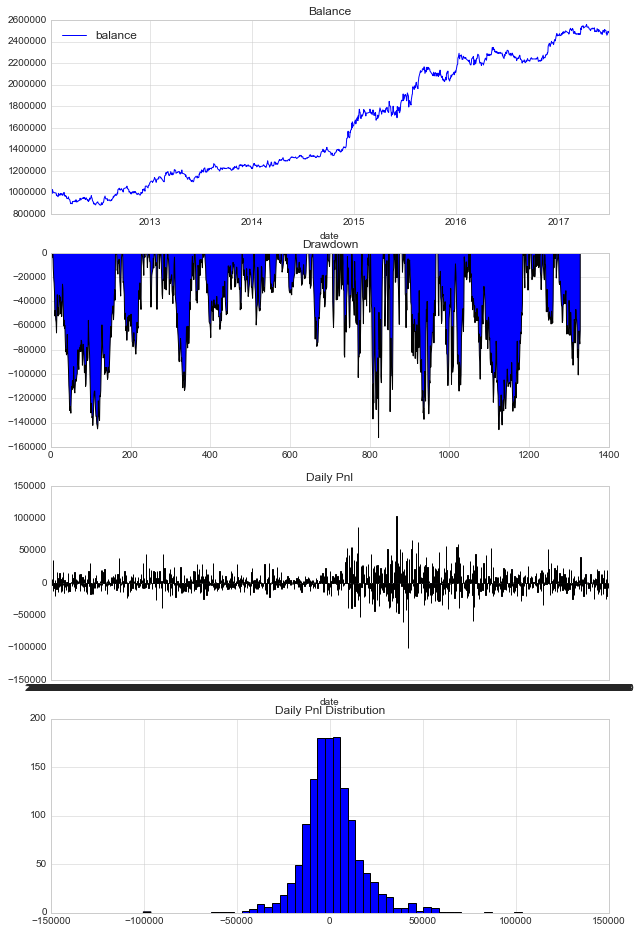

In [4]:
# 合并获得组合回测结果
dfp = df1 + df2

# 注意如果被抛弃的交易日位于回测的前后，即两者不重合的日期中，则不会影响组合曲线正确性
# 但是如果被抛弃的交易日位于回测的中部，即两者重合的日期中，组合曲线会出现错误（丢失交易日）
dfp = dfp.dropna()   

# 创建回测引擎，并设置组合回测初始资金后，显示结果
engine = BacktestingEngine()
engine.setCapital(1000000)
dfp, result = engine.calculateDailyStatistics(dfp)
engine.showDailyResult(dfp, result)

2018-01-07 17:24:26.175000	------------------------------
2018-01-07 17:24:26.175000	首个交易日：	2012-01-11
2018-01-07 17:24:26.175000	最后交易日：	2017-06-30
2018-01-07 17:24:26.175000	总交易日：	1328
2018-01-07 17:24:26.175000	盈利交易日	648
2018-01-07 17:24:26.175000	亏损交易日：	679
2018-01-07 17:24:26.175000	起始资金：	1000000
2018-01-07 17:24:26.175000	结束资金：	1,815,424.82
2018-01-07 17:24:26.175000	总收益率：	81.54
2018-01-07 17:24:26.175000	总盈亏：	815,424.82
2018-01-07 17:24:26.175000	最大回撤: 	-193,351.02
2018-01-07 17:24:26.175000	总手续费：	216,395.18
2018-01-07 17:24:26.175000	总滑点：	450,060.0
2018-01-07 17:24:26.175000	总成交金额：	7,213,172,820.0
2018-01-07 17:24:26.175000	总成交笔数：	7,501.0
2018-01-07 17:24:26.175000	日均盈亏：	614.02
2018-01-07 17:24:26.176000	日均手续费：	162.95
2018-01-07 17:24:26.176000	日均滑点：	338.9
2018-01-07 17:24:26.176000	日均成交金额：	5,431,606.04
2018-01-07 17:24:26.176000	日均成交笔数：	5.65
2018-01-07 17:24:26.176000	日均收益率：	0.05%
2018-01-07 17:24:26.176000	收益标准差：	1.07%
2018-01-07 17:24:26.176000	Sharpe Ratio：	0.66


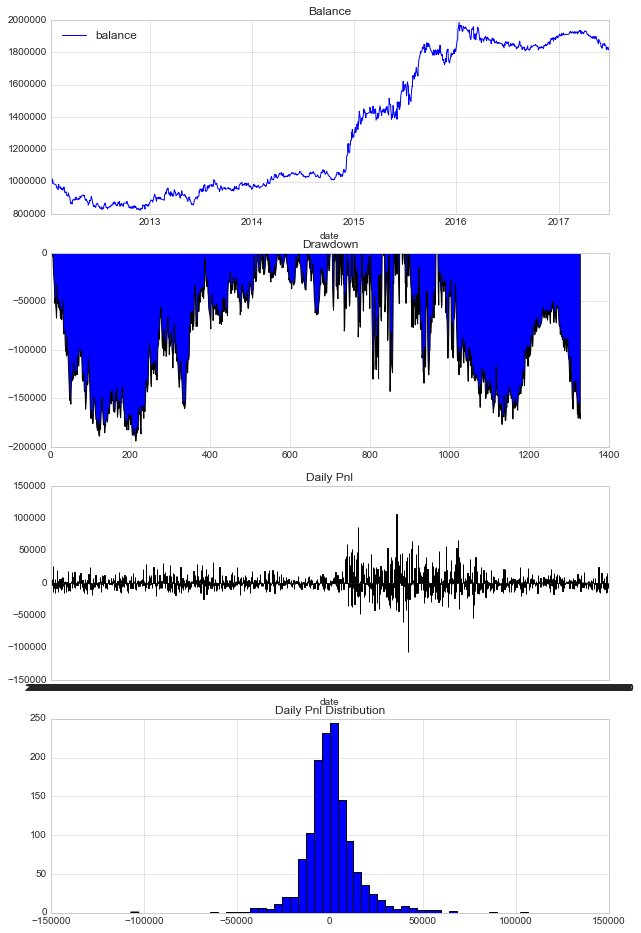

In [5]:
engine = BacktestingEngine()
engine.setCapital(1000000)
df1, result = engine.calculateDailyStatistics(df1)
engine.showDailyResult(df1, result)